In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import buy_v_rent as renting
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

In [114]:
df = renting.get_data(
    total_years=35,
             initial_rent=1500,
             home_price=850000,
             down_payment_perc=0.20,
             loan_term_years=30,
             loan_interest=0.067,
             property_tax_rate=0.0085,
             stock_interest=.08,
             home_value_interest=.05,
             tenant_rent=1000)

In [115]:
df

,months,year,home_value,property_tax_monthly,home_upkeep_monthly,mortgage_payment,down_payment,remaining_debt,monthly_interest_owed,net_worth_with_home,tenant_rent,paid_towards_home,rent,excess_available_to_invest_monthly_renting,cumulative_invested_renting,net_worth_renting,effective_net_worth_renting,effective_net_worth_with_home
0,0,0.000000,8.500000e+05,602.083333,708.333333,4299.248778,170000,679385.587569,3684.836347,1.706144e+05,1000.000000,174609.665445,1500.000000,173109.665445,1.731097e+05,1.731097e+05,1.471432e+05,1.603775e+05
1,1,0.083333,8.500000e+05,602.083333,708.333333,4299.248778,0,678767.845713,3681.506922,1.712322e+05,1000.000000,4609.665445,1500.000000,3109.665445,1.773331e+05,1.773331e+05,1.507332e+05,1.609582e+05
2,2,0.166667,8.500000e+05,602.083333,708.333333,4299.248778,0,678146.756390,3678.159455,1.718532e+05,1000.000000,4609.665445,1500.000000,3109.665445,1.815838e+05,1.815838e+05,1.543462e+05,1.615420e+05
3,3,0.250000,8.500000e+05,602.083333,708.333333,4299.248778,0,677522.301460,3674.793848,1.724777e+05,1000.000000,4609.665445,1500.000000,3109.665445,1.858617e+05,1.858617e+05,1.579825e+05,1.621290e+05
4,4,0.333333,8.500000e+05,602.083333,708.333333,4299.248778,0,676894.462685,3671.410004,1.731055e+05,1000.000000,4609.665445,1500.000000,3109.665445,1.901672e+05,1.901672e+05,1.616422e+05,1.627192e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,34.583333,4.465346e+06,3162.953256,3721.121478,0.000000,0,0.000000,0.000000,4.465346e+06,5253.347969,1630.726765,7880.021954,-6249.295188,6.682986e+06,6.682986e+06,5.680538e+06,4.197425e+06
416,416,34.666667,4.465346e+06,3162.953256,3721.121478,0.000000,0,0.000000,0.000000,4.465346e+06,5253.347969,1630.726765,7880.021954,-6249.295188,6.719735e+06,6.719735e+06,5.711775e+06,4.197425e+06
417,417,34.750000,4.465346e+06,3162.953256,3721.121478,0.000000,0,0.000000,0.000000,4.465346e+06,5253.347969,1630.726765,7880.021954,-6249.295188,6.756721e+06,6.756721e+06,5.743213e+06,4.197425e+06
418,418,34.833333,4.465346e+06,3162.953256,3721.121478,0.000000,0,0.000000,0.000000,4.465346e+06,5253.347969,1630.726765,7880.021954,-6249.295188,6.793945e+06,6.793945e+06,5.774853e+06,4.197425e+06


In [116]:
def plot_dataframe_columns(df, x_column='months'): 
    """
    Generates separate Plotly line graphs for each column in a DataFrame, 
    except for the specified x-axis column.

    Args:
      df: pandas DataFrame.
      x_column: str, name of the column to use for the x-axis. 
               Defaults to 'months'.
    """
    
    for column in df.columns:
        if column == x_column:
            continue

        fig = px.line(df, x=x_column, y=column, title=f"{column} over Time")
        fig.show()

In [117]:
def create_stacked_bar_with_total_line(df, x_col, y_cols, signs=None):
    """
    Creates a stacked bar chart with a line representing the total of all values.

    Args:
      df: pandas DataFrame containing the data.
      x_col: Name of the column to use for the x-axis (time).
      y_cols: List of names of the columns to use for the y-axis (values).

    Returns:
      A Plotly Figure object.
    """
    if signs is None:
        signs = [1]* len(y_cols)
    fig = go.Figure()

    for i, col in enumerate(y_cols):
        fig.add_trace(go.Bar(name=col, x=df[x_col], y=signs[i]*df[col]))

    # Calculate the total of all y-columns
    df['Total'] = sum([signs[i] * df[col] for i, col in enumerate(y_cols)]) 
    fig.add_trace(go.Scatter(name='Total', x=df[x_col], y=df['Total'], mode='lines+markers'))

    fig.update_layout(barmode='relative', bargap=0)  # Set bargap to 0 for a continuous look

    return fig


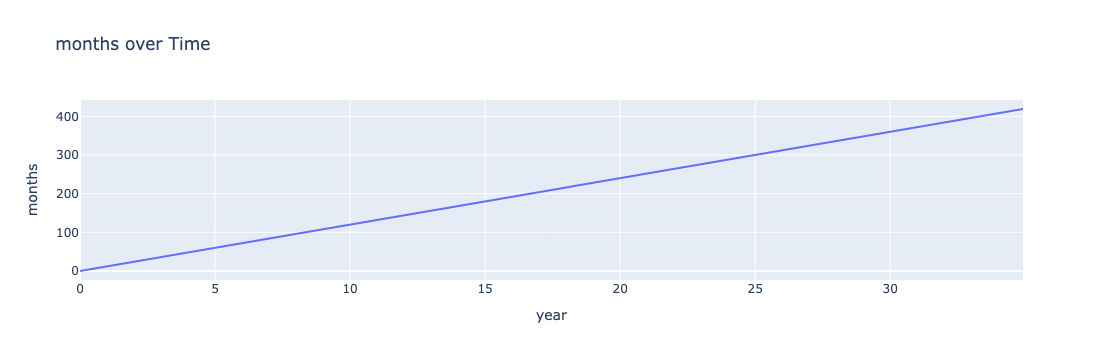

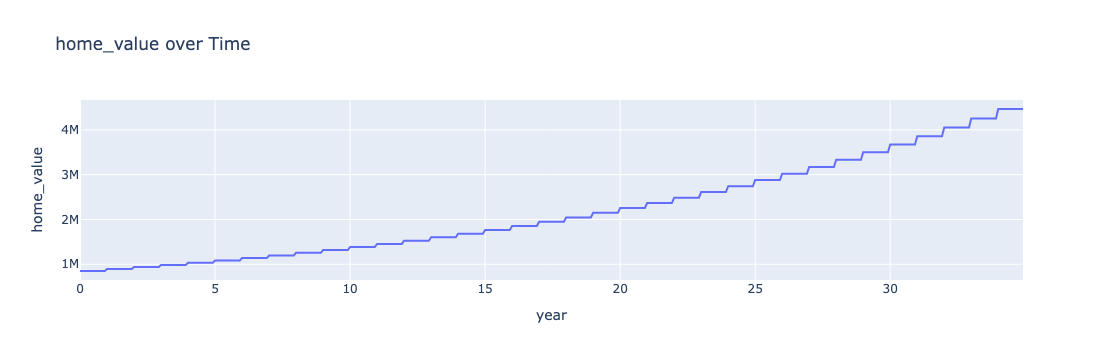

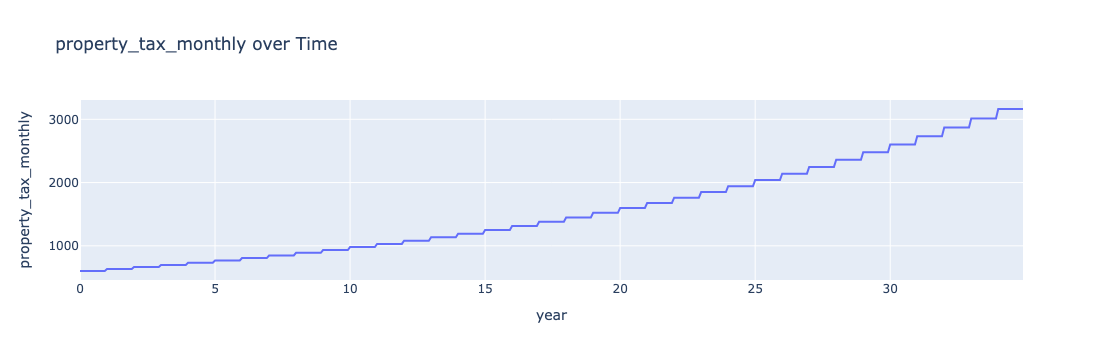

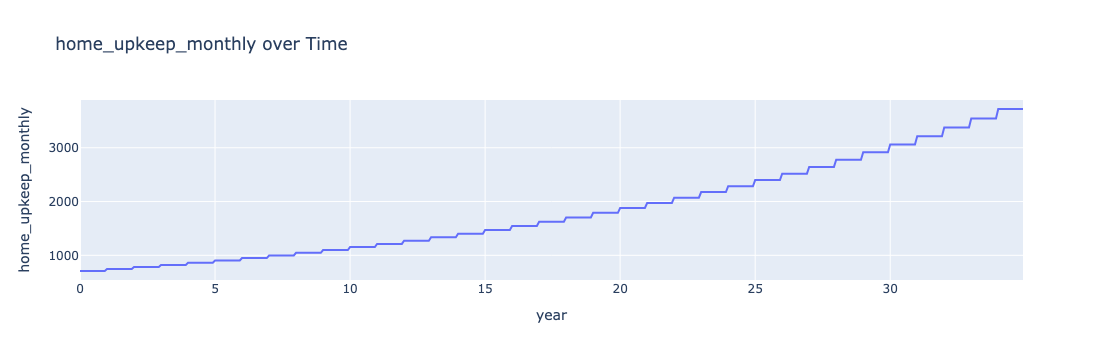

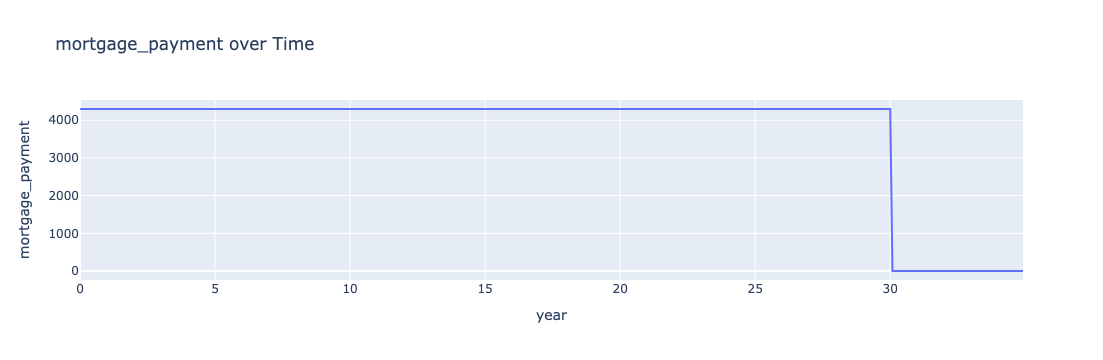

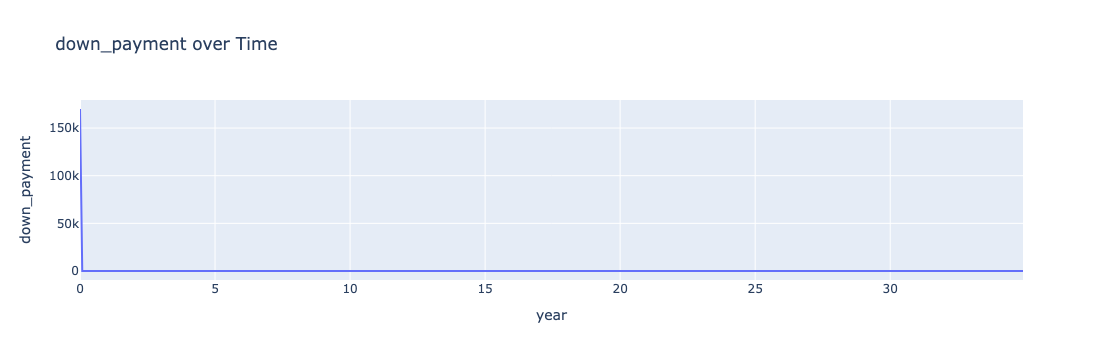

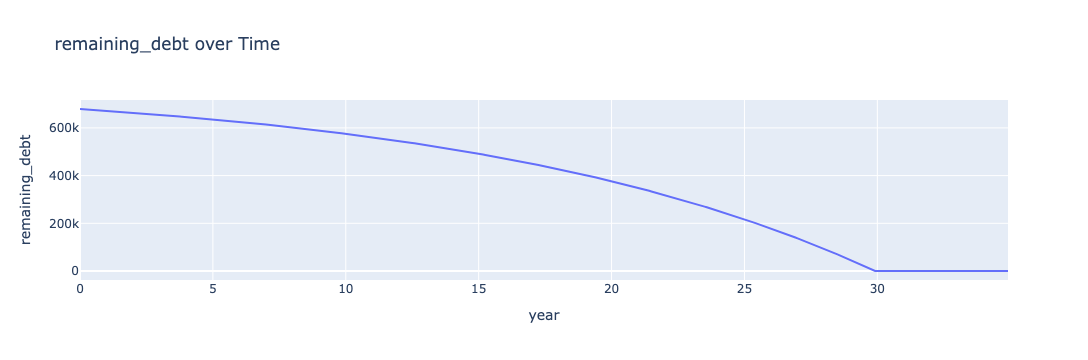

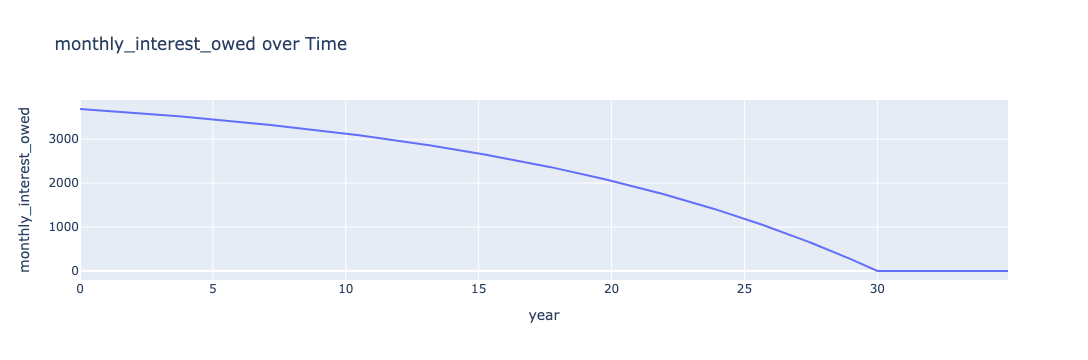

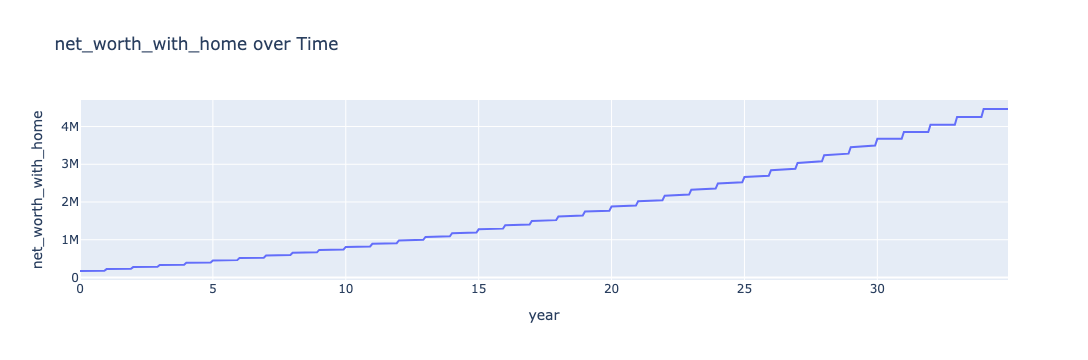

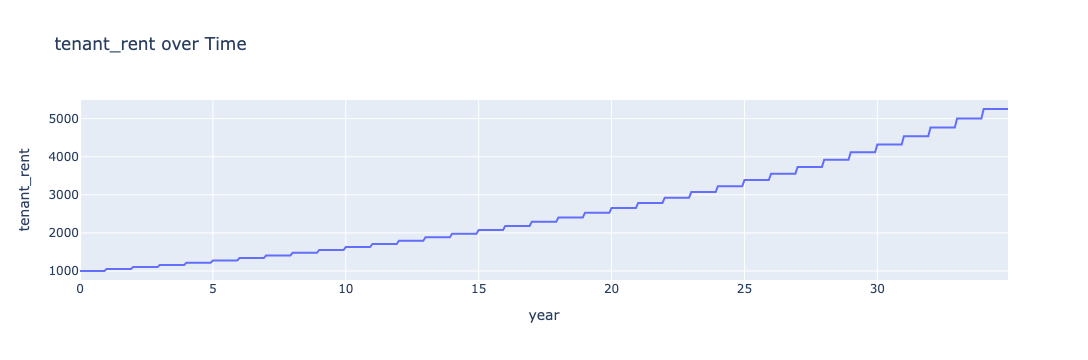

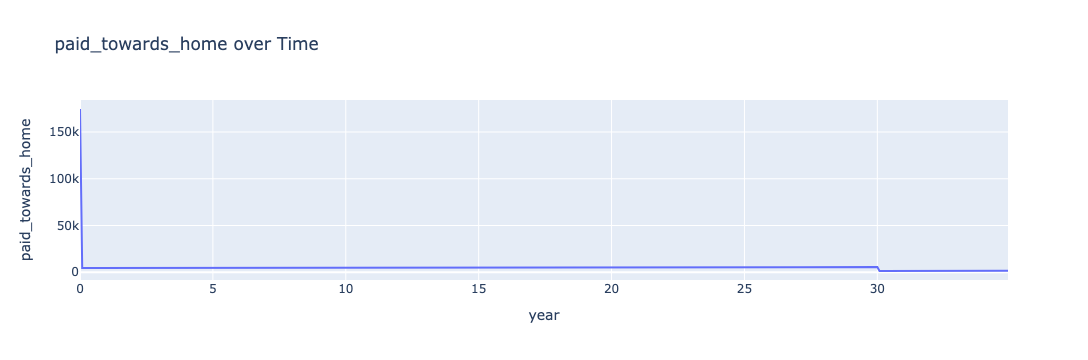

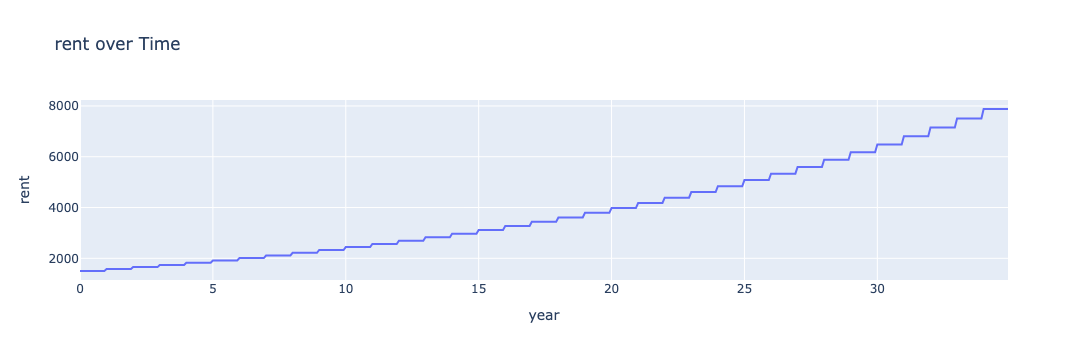

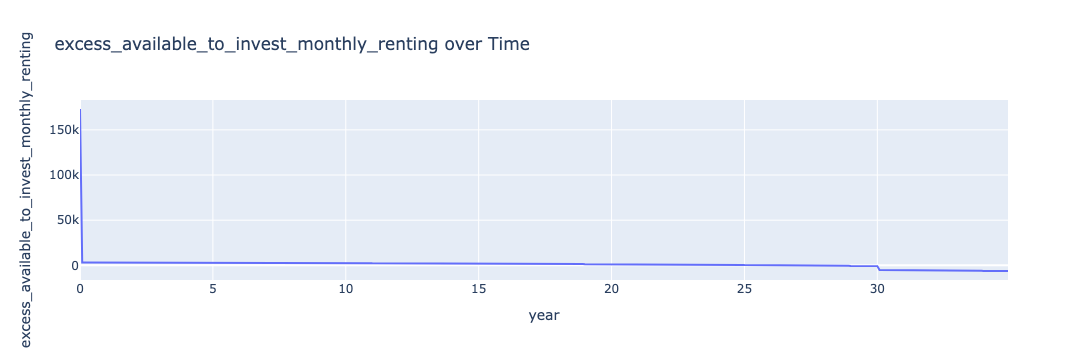

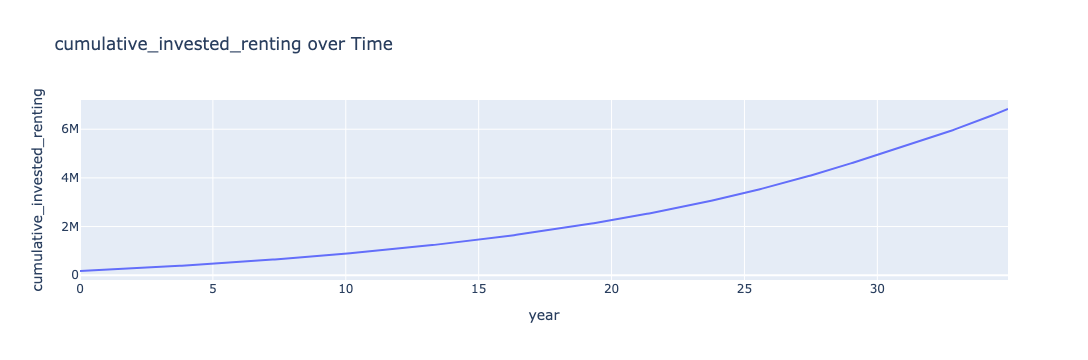

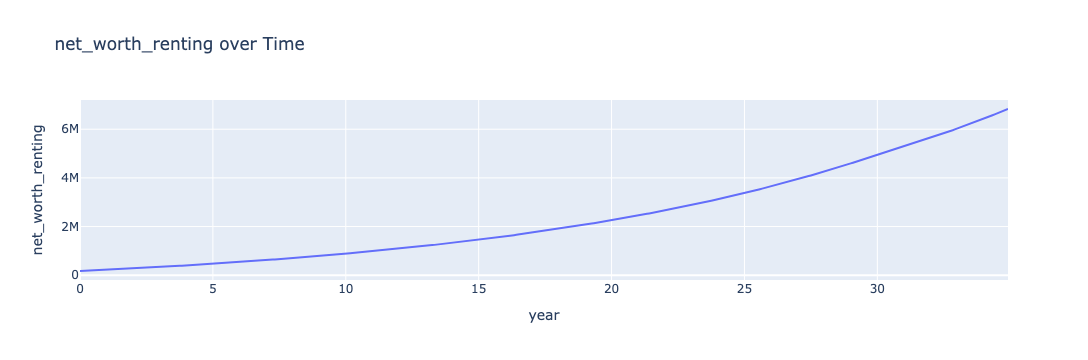

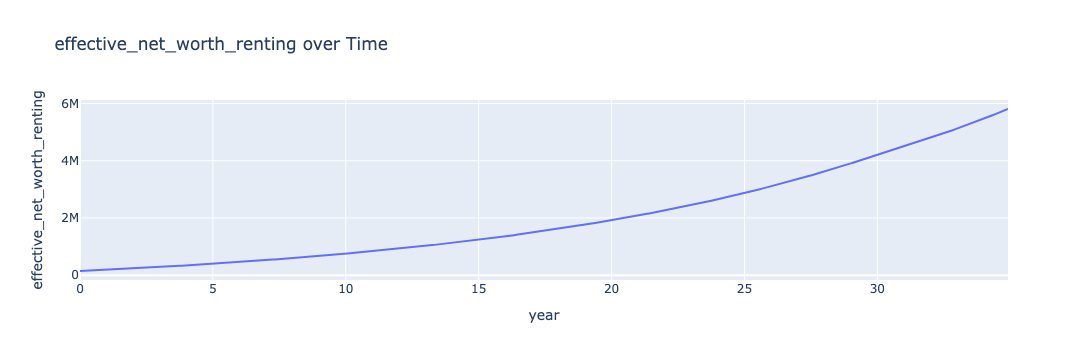

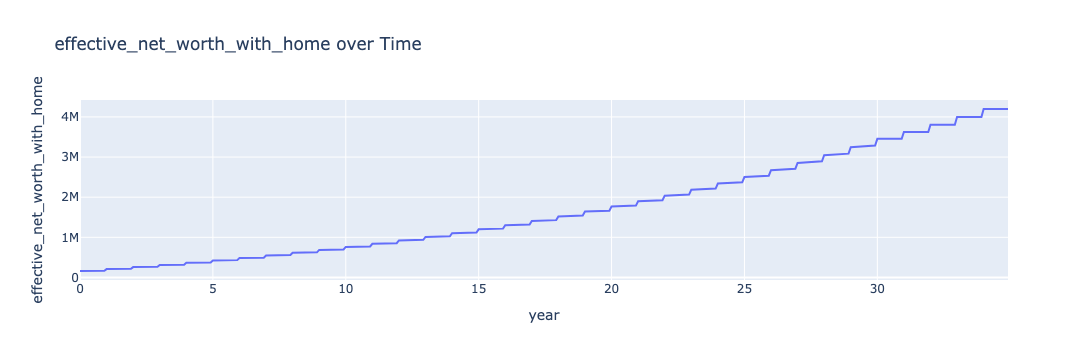

In [118]:
# Plot each column (except 'months')
plot_dataframe_columns(df, x_column='year') 

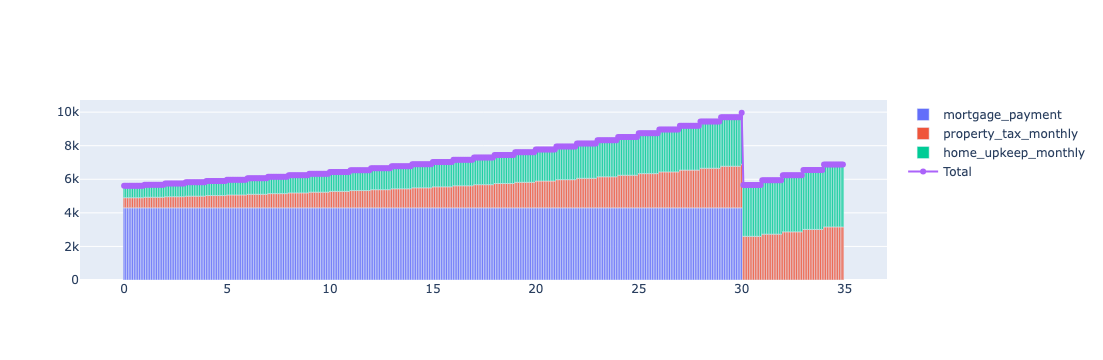

In [119]:
create_stacked_bar_with_total_line(df, 'year', ['mortgage_payment', 'property_tax_monthly', 'home_upkeep_monthly'], [1,1,1])

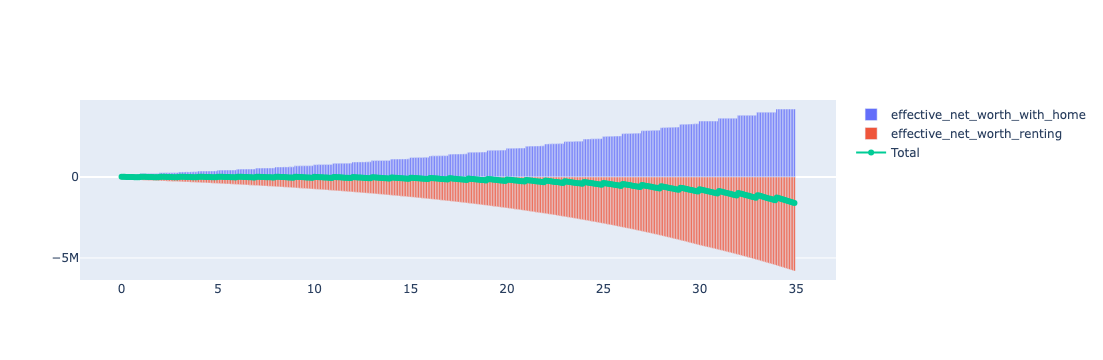

In [120]:
create_stacked_bar_with_total_line(df, 'year', ['effective_net_worth_with_home', 'effective_net_worth_renting'], [1,-1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['monthly investment return with no rent and no mortgage', 'cumulative available to invest'], [1,1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['home_owned', 'cumulative property_tax', 'cumulative interest lost to property tax', 'interest lost to down payment', 'cumulative investment after mortgage'], [1,-1,-1,-1,1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['cumulative investment while renting', 'real price of rent', 'invested instead of downpayment'], [1,-1,1])


In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['buying', 'renting'], [1, 1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['home_owned',
                                                'cumulative investment after mortgage',
                                                'cumulative property_tax',
                                                'cumulative interest lost to property tax',
                                                'interest lost to down payment',],
                                   [1,1,-1,-1,-1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['diff'], [1])

In [ ]:
import plotly.graph_objects as go

# Sample data
categories = ['Category A', 'Category B', 'Category C']
positive_values = [10, 15, 8]
positive2_values = [11, 13, 8]
negative_values = [-5, -3, 12]

# Calculate the sum of all values
total_values = [sum(x) for x in zip(positive_values, positive2_values, negative_values)]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=categories, y=positive_values),
    go.Bar(name='Positive2', x=categories, y=positive2_values),
    go.Bar(name='Negative', x=categories, y=negative_values),
    go.Scatter(name='Total', x=categories, y=total_values, mode='lines+markers') 
])

# Set barmode to 'relative'
fig.update_layout(barmode='relative')

fig.show()


In [ ]:
1500*.054